# Assignment 4: Correlation Analysis and Bootstrapping

## Objective

The field of statistics is divided into two major parts: descriptive and inferential. In this assignment, we will cover two important topics in statistics: correlation analysis and bootstrapping, where the former belongs to the descriptive part and the latter belongs to the inferential part. After this assignment, you will be able to answer the following questions:

1. How to visualize the relationship between two variables?  
2. What is Pearson's correlation? How to compute it?
3. What is Spearman's rank correlation? How to compute it?
4. What's the difference between Pearson's correlation and Spearman's rank correlation? 
5. How to estimate a population parameter based on a sample?
6. How to use the bootstrap to quantify the uncertainty of an estimated value?

**Requirements:**
* Use [pandas](https://pandas.pydata.org/) to manipulate data.
* Use [matplotlib](https://matplotlib.org/) or [seaborn](https://seaborn.pydata.org) to make plots.
* Please pay attention to visualization principles. 


The data can be downloaded from [A4-data.zip](A4-data.zip).


## Part 1. Correlation Analysis

As a data scientist, you often face this kind of question: "Are A and B correlated?" For example, 

* Do Canadian Currency and Oil Price move together?
* Do Vancouver Housing Price and US Stock Market have any correlation?
* Are GPA and Gender independent? 

To answer these questions, you need to conduct a correlation analysis. 

Imagine you are a data scientist working at a real-estate company. You download a property_tax_report from this [webpage](https://opendata.vancouver.ca/explore/dataset/property-tax-report/table/?refine.report_year=2021). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2021.  

You may think that for a newly built house, it tends to have a higher price than the ones built decades ago. In this assignment, your first job is to figure out whether YEAR_BUILT and HOUSE_PRICE are correlated. 

We first load the data as a DataFrame. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/property-tax-report_2021.csv")


df['HOUSE_PRICE'] = df.apply(lambda x: (x['CURRENT_LAND_VALUE'] \
                                        +x['CURRENT_IMPROVEMENT_VALUE'])/1000000.0, axis = 1)

df.head()

,Unnamed: 0,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,BLOCK,PLAN,DISTRICT_LOT,...,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_IMPROVEMENT_VALUE,PREVIOUS_LAND_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,HOUSE_PRICE
0,0,028-920-317,STRATA,640170030078,64017003,C-3A,Commercial,NaN,EPS984,302,...,236000.0,2021.0,231000.0,366000.0,2012.0,2012.0,NaN,13,2021,0.6020
1,1,013-935-178,LAND,144823280000,14482328,RS-1,One Family Dwelling,B,VAP2277,319,...,645000.0,2021.0,647000.0,1507000.0,2008.0,2008.0,NaN,12,2021,2.3160
2,2,027-303-756,STRATA,161599060186,16159906,CD-1 (415),Comprehensive Development,NaN,BCS2611,FC,...,230000.0,2021.0,227000.0,632000.0,2007.0,2007.0,NaN,26,2021,0.8960
3,3,015-330-265,LAND,634255510000,63425551,RT-4,Two Family Dwelling,147,VAP381,264A,...,76600.0,2021.0,77900.0,1715000.0,1924.0,1965.0,NaN,14,2021,1.8796
4,4,015-627-837,LAND,694228080000,69422808,RT-10,Two Family Dwelling,60,VAP187,301,...,NaN,NaN,NaN,NaN,1927.0,1998.0,NaN,15,2021,NaN


### Task A. Visualizations

Since the housing price varies a lot by locations, we will only consider the houses whose postcode starts with 'V6A'. Furthermore, we remove the houses that were built before 1900.

<img src="img/v6a.png" width="400">

In the following, please make two subplots in one row. For the left subplot, it is a scatter plot with X = `YEAR_BUILT` and Y = `HOUSE_PRICE`; for the right subplot, it is a hexbin plot (gridsize = 20) with X = `YEAR_BUILT` and Y = `HOUSE_PRICE`.

<AxesSubplot:xlabel='Year Built', ylabel='House Prices'>

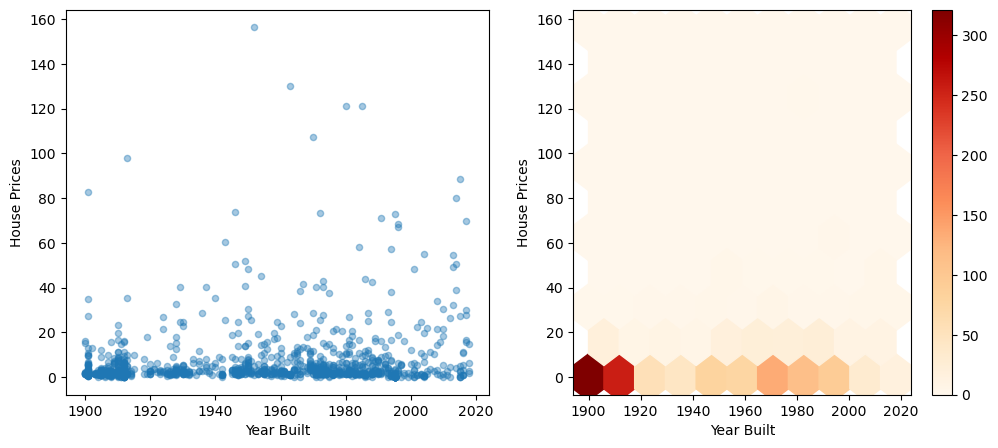

In [2]:
#<-- Write Your Code -->

req_df = df[(df["YEAR_BUILT"].between(1900, 2021, inclusive='both')) &
           (df['PROPERTY_POSTAL_CODE'].str.startswith('V6A')) & 
           (df['LEGAL_TYPE'] == 'LAND')]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

req_df.plot.scatter(x="YEAR_BUILT",
            y="HOUSE_PRICE",
            alpha=0.4, 
            ax=axes[0],
            xlabel="Year Built",
            ylabel="House Prices")
req_df.plot.hexbin(x="YEAR_BUILT",
            y="HOUSE_PRICE",
            xlabel="Year Built",
            ylabel="House Prices",
            gridsize=10,
            cmap="OrRd",
            ax=axes[1])


Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
1. From the scatterplot, we can see a concentration in the house prices consistently falling in the 0-20M dollar range but also the plot gets more scattered towards the top in the years after 1960 indicating that the prices rose from those years onwards as well. 
2. From the hexbin plot, we can understand that from 1900-1920 the house prices were concentrated around 0-20M but in later years the prices are on an upward trend.

The above plots provide a general impression of the relationship between variables. There are some other visualizations that can provide more insights. One option is to bin one variable and plot percentiles of the other. 


In the following, please make three subplots in a row, where each subplot is a scatter plot with X = YEAR_BUILT and Y = HOUSE_PRICE. 
* The first subplot shows how the 25th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `25TH_HOUSE_PRICE`); 
* The second subplot shows how the 50th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `50TH_HOUSE_PRICE`); 
* The third subplot shows how the 75th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `75TH_HOUSE_PRICE`);  


<AxesSubplot:xlabel='Year Built', ylabel='75th Percentile House Prices'>

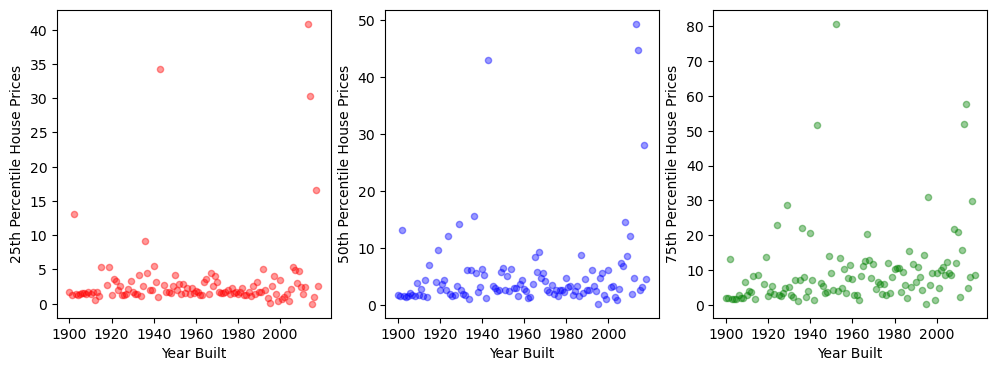

In [3]:
#<-- Write Your Code -->
import numpy as np

df1 = req_df[["HOUSE_PRICE", "YEAR_BUILT"]].groupby("YEAR_BUILT").quantile(0.25).reset_index()
df1 = df1.rename(columns={"HOUSE_PRICE": "25TH_HOUSE_PRICE"})
df2 = req_df[["HOUSE_PRICE", "YEAR_BUILT"]].groupby("YEAR_BUILT").quantile(0.5).reset_index()
df2 = df2.rename(columns={"HOUSE_PRICE": "50TH_HOUSE_PRICE"})
df3 = req_df[["HOUSE_PRICE", "YEAR_BUILT"]].groupby("YEAR_BUILT").quantile(0.75).reset_index()
df3 = df3.rename(columns={"HOUSE_PRICE": "75TH_HOUSE_PRICE"})

xticks = np.arange(start=req_df["YEAR_BUILT"].min(), stop=req_df["YEAR_BUILT"].max(), step=20)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
df1.plot.scatter(x="YEAR_BUILT",
            y="25TH_HOUSE_PRICE",
            alpha=0.4, 
            ax=axes[0],
            color = "red",
            xlabel="Year Built",
            ylabel="25th Percentile House Prices",
            xticks=xticks)

df2.plot.scatter(x="YEAR_BUILT",
            y="50TH_HOUSE_PRICE",
            alpha=0.4, 
            color="blue",
            ax=axes[1],
            xlabel="Year Built",
            ylabel="50th Percentile House Prices",
            xticks=xticks)

df3.plot.scatter(x="YEAR_BUILT",
            y="75TH_HOUSE_PRICE",
            alpha=0.4, 
            color = "green",
            ax=axes[2],
            xlabel="Year Built",
            ylabel="75th Percentile House Prices",
            xticks=xticks)


Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
25% of house price values in most of the years from 1900 to 2020 generally lies between 0 and 10M Dollars.
Based on 75% of house price values, we can see that house prices have experienced more visible increase as we move from 1900 to 2020.
1. The 25th Percentile House prices Scatter Plot mostly lie in the range of $0-10 M from 1900-2021.
2. From the 50th and 75th Percentile House Prices Scatter Plots we can see the upward trend in house prices over the years.

### Task B. Correlation Coefficient

A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationship between a pair of variables. 

In the following, please implement `calc_pearson()` and `calc_spearman()`, respectively. Note that you are *NOT* allowed to use [corr](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) from Pandas or [pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr)/[spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr) from scipy.stats to do this task. In other words, you need to implement the actual algorithms for pearson and spearman.

In [4]:
import math
def calc_pearson(df, x, y):
    #<-- Write Your Code --> 
    pearson_df = df[[x,y]]
    pearson_df = pearson_df.dropna()
    
    x_avg = pearson_df[x].sum() / pearson_df[x].count()
    y_avg = pearson_df[y].sum() / pearson_df[y].count()
    
    pearson_df["x_deviation"] = pearson_df[x] - x_avg
    pearson_df["y_deviation"] = pearson_df[y] - y_avg
    
    pearson_df["x_dev_squared"] = pearson_df["x_deviation"] ** 2
    pearson_df["y_dev_squared"] = pearson_df["y_deviation"] ** 2
    
    pearson_df["x_dev_y_dev"]  = pearson_df["x_deviation"] * pearson_df["y_deviation"]
    
    pearsons_coef = pearson_df["x_dev_y_dev"].sum() / (math.sqrt(pearson_df["x_dev_squared"].sum()) * math.sqrt(pearson_df["y_dev_squared"].sum()))
    
    return pearsons_coef
    

def calc_spearman(df, x, y):
    #<-- Write Your Code -->
    spearman_df = df[[x,y]]
    spearman_df = spearman_df.dropna()
    
    spearman_df["rank_x"] = spearman_df[x].rank()
    spearman_df["rank_y"] = spearman_df[y].rank()
    
    x_avg = spearman_df["rank_x"].sum() / spearman_df["rank_x"].count()
    y_avg = spearman_df["rank_y"].sum() / spearman_df["rank_y"].count()
    
    spearman_df["x_deviation"] = spearman_df["rank_x"] - x_avg
    spearman_df["y_deviation"] = spearman_df["rank_y"] - y_avg
    
    spearman_df["x_dev_squared"] = spearman_df["x_deviation"] ** 2
    spearman_df["y_dev_squared"] = spearman_df["y_deviation"] ** 2
    
    spearman_df["x_dev_y_dev"]  = spearman_df["x_deviation"] * spearman_df["y_deviation"]
    
    spearmans_coef = spearman_df["x_dev_y_dev"].sum() / (math.sqrt(spearman_df["x_dev_squared"].sum()) * math.sqrt(spearman_df["y_dev_squared"].sum()))
    
    return spearmans_coef

    
pearsons_coef = calc_pearson(req_df, "HOUSE_PRICE", "YEAR_BUILT")
spearmans_coef = calc_spearman(req_df, "HOUSE_PRICE", "YEAR_BUILT")

print("Pearson's Coefficient: %f" % pearsons_coef)
print("Spearson's Coefficient: %f" % spearmans_coef)


Pearson's Coefficient: 0.207612
Spearson's Coefficient: 0.197389


Then, you can use these two functions to compute the Pearson's correlation as well as Spearman's rank correlation for three pairs of variables: <`25TH_HOUSE_PRICE`, `YEAR_BUILT`>, <`50TH_HOUSE_PRICE`, `YEAR_BUILT`>, and <`75TH_HOUSE_PRICE`, `YEAR_BUILT`>. 

In [5]:
corr_df = df1[["YEAR_BUILT", "25TH_HOUSE_PRICE"]]
corr_df["50TH_HOUSE_PRICE"] = df2["50TH_HOUSE_PRICE"]
corr_df["75TH_HOUSE_PRICE"] = df3["75TH_HOUSE_PRICE"]
corr_df

for TH in ["25TH", "50TH", "75TH"]:
    print(TH+"_HOUSE_PRICE\t pearson=%f\t spearman=%f"  \
          %(calc_pearson(corr_df, "YEAR_BUILT", TH+"_HOUSE_PRICE"), \
            calc_spearman(corr_df, "YEAR_BUILT", TH+"_HOUSE_PRICE")))

25TH_HOUSE_PRICE	 pearson=0.139627	 spearman=0.046738
50TH_HOUSE_PRICE	 pearson=0.196118	 spearman=0.192765
75TH_HOUSE_PRICE	 pearson=0.240414	 spearman=0.403690


Please write down the **two** most interesting findings that you draw from the result.

 

**Findings**
1. For the 25th Percentile House Prices, the Pearson & Spearman Coefficients are 0.139627 & 0.046738 respectively indicating that the House Prices and Year They Were Built in are quite independent of one another.
2. However, as we move towards the 75th Percentile House Prices, we can see that the Pearson & Spearman's Coefficient are 0.240414 & 0.403690 respectively, indicating that there may be a slight relationship between the two, from the rest of the analysis carried out during this study, we know that as years go on the house prices have increased over time and these values support the same. 

## Part 2. Bootstrapping

In reality, it is more often than not that you can only collect a sample of the data. Whenever you derive a conclusion from a sample (e.g., Vancouver's housing price has increased by 10% since last year), you should ALWAYS ask yourself: **"CAN I TRUST IT?"**. In other words, you want to know that if the same analysis was conducted on the full data, would the same conclusion be derived? In Part 2, you will learn how to use bootstrapping to answer this question. 

In [6]:
df_sample = pd.read_csv("data/property-tax-report_2021_sample.csv")

df_sample['CURRENT_PRICE'] = df_sample.apply(lambda x: x['CURRENT_LAND_VALUE'] \
                                             +x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df_sample['PREVIOUS_PRICE'] = df_sample.apply(lambda x: x['PREVIOUS_LAND_VALUE'] \
                                              +x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)

df_sample = df_sample[df_sample['LEGAL_TYPE'] == 'STRATA']

### Task 1. Analysis Result Without Bootstrapping

Please compute the median of PREVIOUS_PRICE and CURRENT_PRICE, respectively, and compare them in a bar chart.

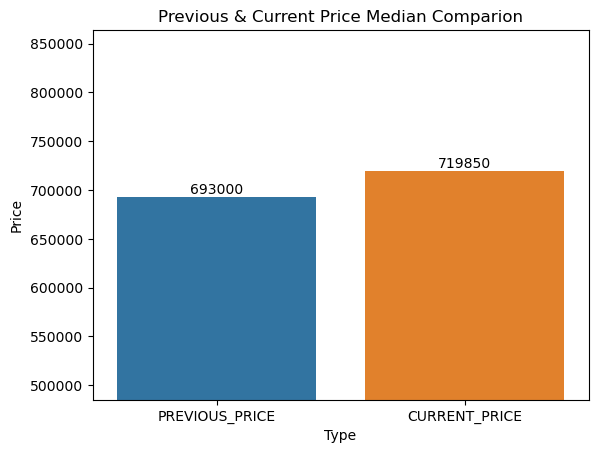

In [7]:
# --- Write your code below ---
previous_median = df_sample['PREVIOUS_PRICE'].dropna().median()
current_median = df_sample['CURRENT_PRICE'].dropna().median()

median_df = pd.DataFrame(df_sample[['PREVIOUS_PRICE', 'CURRENT_PRICE']].median())
median_df = median_df.reset_index()
median_df = median_df.rename(columns={0:'Price', 'index': "Type"})

fig = sns.barplot(x = "Type", y="Price", data = median_df)
fig.set_ylim( 0.7 * min(previous_median, current_median), 1.2*max(previous_median, current_median))
fig.set_title("Previous & Current Price Median Comparion")

for i in fig.containers:
    fig.bar_label(i,)
    

### Task 2. Analysis Result With Bootstrapping

From the above chart, we find that the median of PREVIOUS_PRICE is about 0.77 M, and the median of CURRENT_PRICE is about 0.72 M. Since the numbers were obtained from the sample, **"CAN WE TRUST THESE NUMBERS?"**

In the following, please implement the bootstrap by yourself, compute a 95%-confidence interval for each number, and add the confidence intervals to the above bar chart. [This document](./MIT18_05S14_Reading24.pdf) gives a good tutorial about the bootstrap. You can find the description of the algorithm in Section 7.

In [8]:
# --- Write your code below ---
def bootstrap(prices_df,column,actual_median,confidence_level=0.95):
    bootstrap_medians = list()
    bootstrap_diffs = list()

    
    for i in range(1000):
        # Make the Bootstrap DF
        bootstrap_arr = np.random.choice(prices_df, size=len(prices_df), replace=True)


        # Calculate the bootstrap sample median and bootstrap difference
        bootstrap_median = np.median(bootstrap_arr)
        boostrap_diff = bootstrap_median - actual_median
        
        
        # Append the bootstrap median and bootstrap diffs
        bootstrap_medians.append(bootstrap_median)
        bootstrap_diffs.append(boostrap_diff)
    
    # Sort values and get the confidence interval
    bootstrap_diffs = np.sort(bootstrap_diffs)
    conf_interval = np.percentile(bootstrap_diffs,[100*(1-confidence_level)/2,100*(1-(1-confidence_level)/2)])
    
    # Finf upper and lower bounds
    lb = actual_median-max(conf_interval[0], conf_interval[1])
    ub = actual_median-min(conf_interval[0], conf_interval[1])
    
    return("The " + str(confidence_level*100) + " Confidence Interval for " + column + " is " + str([lb, ub]))





In [9]:
current_df = df_sample['CURRENT_PRICE'].dropna()
previous_df = df_sample['PREVIOUS_PRICE'].dropna()

print(bootstrap(current_df, 'CURRENT_PRICE', current_median, 0.95))
print(bootstrap(previous_df, 'PREVIOUS_PRICE', previous_median, 0.95))

The 95.0 Confidence Interval for CURRENT_PRICE is [695187.5, 750712.5]
The 95.0 Confidence Interval for PREVIOUS_PRICE is [664000.0, 718025.0]


## Submission

Complete the code in this notebook, and submit it to the CourSys activity Assignment 4.